 # Problem 1



**Generating Song Lyrics with NumPy**

**Scenario:** You are working on a RAG-based application that generates creative text formats like song lyrics. You have a dataset of existing popular song lyrics stored in a CSV file. Your task is to use NumPy to:

1. Load the song lyrics data from the CSV file.
2. Preprocess the data by converting all lyrics to lowercase and removing punctuation.
3. Use NumPy to create a random sample of 10 song lyrics from the dataset.

**Dataset :**

[**Lyrics Sample Dataset**](https://docs.google.com/spreadsheets/d/1GmUxCf1m-I94DsVMUaOsTikvh9QqFZpjmLvtNI61ylA/edit?usp=sharing)

Load the song lyrics data from the CSV file

In [ ]:
import pandas as pd
import numpy as np
import string
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = "/content/drive/MyDrive/kata-2(problem 1&2)/Lyrics_Dataset.csv"
df = pd.read_csv(file_path)

In [ ]:
df.head()


,Lyrics
0,I wanna dance with somebody (who loves me)
1,"You're the one that I want, oohoo, honey"
2,"Baby, baby, baby, oh"
3,A sky full of stars and a heart full of scars
4,Can't stop the feeling! So excited


In [ ]:
try:
    df = pd.read_csv(file_path)
    print("File loaded successfully.\n")
    print("--- Before Preprocessing ---")
    display(df.head())
except FileNotFoundError:
    print("File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred while loading the file: {e}")

File loaded successfully.

--- Before Preprocessing ---


,Lyrics
0,I wanna dance with somebody (who loves me)
1,"You're the one that I want, oohoo, honey"
2,"Baby, baby, baby, oh"
3,A sky full of stars and a heart full of scars
4,Can't stop the feeling! So excited


In [ ]:
try:
    df["Lyrics"] = df["Lyrics"].str.lower()
    df["Lyrics"] = df["Lyrics"].str.replace(f"[{string.punctuation}]", "", regex=True)

    print("\n--- After Preprocessing ---")
    display(df.head())
except KeyError:
    print("'Lyrics' column not found. Please check your CSV columns.")
except Exception as e:
    print(f"An error occurred during preprocessing: {e}")



--- After Preprocessing ---


,Lyrics
0,i wanna dance with somebody who loves me
1,youre the one that i want oohoo honey
2,baby baby baby oh
3,a sky full of stars and a heart full of scars
4,cant stop the feeling so excited


# Convert lyrics column to NumPy array

In [ ]:
try:
    lyrics_array = df["Lyrics"].to_numpy()
    sample_indices = np.random.choice(len(lyrics_array), size=10, replace=False)
    random_sample = lyrics_array[sample_indices]

    print("\nRandom 10 Lyrics Sample:")
    for i, lyric in enumerate(random_sample, 1):
        print(f"{i}. {lyric}")

except ValueError:
    print("Not enough data to select 10 random samples.")
except Exception as e:
    print(f"An error occurred while displaying random samples: {e}")


Random 10 Lyrics Sample:
1. baby baby baby oh
2. i believe i can fly
3. im blue da ba dee da ba daa
4. i will survive oh as long as i know how
5. like a prayer like a prayer
6. hakuna matata
7. its gettin hot in here so take off all your clothes
8. bye bye bye
9. youre the one that i want oohoo honey
10. im walking on sunshine


# Problem 2

**Scenario**: You are building a RAG-based system to analyze customer reviews and classify them as positive or negative. You have a dataset of customer reviews stored in a CSV file, along with their sentiment labels (positive or negative). Here's your task:

1. Load the customer review data from the CSV file using Pandas.
2. Preprocess the review text by converting it to lowercase and removing punctuation.
3. Calculate the average word count for positive and negative reviews.
4. Visualize the distribution of word count for positive and negative reviews using Matplotlib
5. Plot a positive review and observe it should be near the positive sentiments clusters

**Dataset:**

[**Customer Review**](https://docs.google.com/spreadsheets/d/1C0YjGQ-SONdXS-fqmrNe3Uus5xS3e91izsZFxZN5doA/edit?usp=sharing)

In [1]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import os
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
file_path = "/content/drive/MyDrive/kata-2(problem 1&2)/Customer-SampleDataSet.csv"
df = pd.read_csv(file_path)
print("Dataset loaded successfully!")
print(df.head(), "\n")

Dataset loaded successfully!
                                              Review Sentiment
0  "This product is amazing! It works exactly as ...  positive
1  "This product is a complete waste of money. It...  negative
2  "The product is okay, but it could be better. ...   neutral
3  "I love this product! It's so cute and stylish...  positive
4  "The product arrived broken. I am very unhappy...  negative 



In [5]:
try:
    # Convert text to lowercase and remove punctuation
    df["cleaned_review"] = df["Review"].str.lower()
    df["cleaned_review"] = df["cleaned_review"].str.replace(f"[{string.punctuation}]", "", regex=True)
    print(" Text preprocessing completed successfully.\n")
except Exception as e:
    print(" Error during text preprocessing:", e)
    raise SystemExit

 Text preprocessing completed successfully.



In [6]:
df


,Review,Sentiment,cleaned_review
0,"""This product is amazing! It works exactly as ...",positive,this product is amazing it works exactly as ad...
1,"""This product is a complete waste of money. It...",negative,this product is a complete waste of money it d...
2,"""The product is okay, but it could be better. ...",neutral,the product is okay but it could be better the...
3,"""I love this product! It's so cute and stylish...",positive,i love this product its so cute and stylish iv...
4,"""The product arrived broken. I am very unhappy...",negative,the product arrived broken i am very unhappy w...
5,"""The product is good for the price. It's not t...",neutral,the product is good for the price its not the ...
6,"""This product is exactly what I was looking fo...",positive,this product is exactly what i was looking for...
7,"""The product is very difficult to use. I would...",negative,the product is very difficult to use i wouldnt...
8,"""I'm not sure what to think of this product ye...",neutral,im not sure what to think of this product yet ...
9,"""This product is a lifesaver! It has helped me...",positive,this product is a lifesaver it has helped me s...


In [7]:
try:
    df["word_count"] = df["cleaned_review"].apply(lambda x: len(x.split()))
    avg_counts = df.groupby("Sentiment")["word_count"].mean()
    print(" Average Word Count for Each Sentiment:")
    print(avg_counts, "\n")

except Exception as e:
    print(" Error calculating word counts:", e)
    raise SystemExit

 Average Word Count for Each Sentiment:
Sentiment
negative    16.125000
neutral     18.285714
positive    16.000000
Name: word_count, dtype: float64 



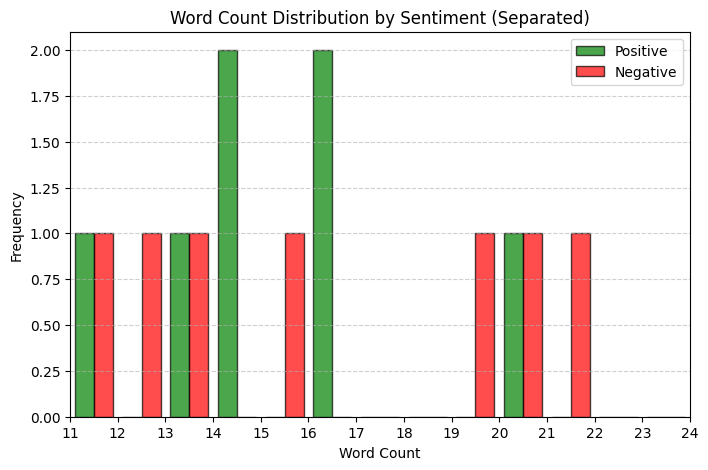

Distribution visualization updated successfully.



In [8]:

import matplotlib.pyplot as plt
import numpy as np

try:
    plt.figure(figsize=(8,5))

    positive_reviews = df[df["Sentiment"] == "positive"]["word_count"]
    negative_reviews = df[df["Sentiment"] == "negative"]["word_count"]
    bins = np.arange(11, 25, 1)
    plt.hist(positive_reviews, bins=bins - 0.2, alpha=0.7, label="Positive",
             color='green', edgecolor='black', rwidth=0.4, align='mid')
    plt.hist(negative_reviews, bins=bins + 0.2, alpha=0.7, label="Negative",
             color='red', edgecolor='black', rwidth=0.4, align='mid')
    plt.xlabel("Word Count")
    plt.ylabel("Frequency")
    plt.title("Word Count Distribution by Sentiment (Separated)")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.xticks(np.arange(11, 25, 1))
    plt.xlim(11, 24)
    plt.show()
    print("Distribution visualization updated successfully.\n")
except Exception as e:
    print("Error while visualizing distributions:", e)
    raise SystemExit


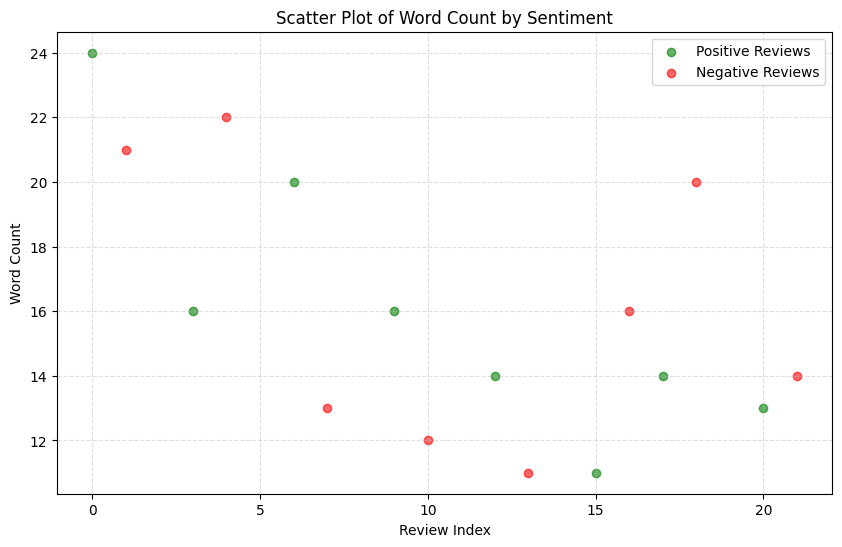

Base scatter plot (sentiment clusters) generated successfully.


In [9]:
import matplotlib.pyplot as plt
import numpy as np

try:
    # Separate the sentiment groups
    positive_reviews = df[df["Sentiment"] == "positive"]["word_count"]
    negative_reviews = df[df["Sentiment"] == "negative"]["word_count"]

    # Plot the scatter clusters
    plt.figure(figsize=(10,6))
    plt.scatter(
        positive_reviews.index,
        positive_reviews,
        color='green',
        alpha=0.6,
        label='Positive Reviews'
    )
    plt.scatter(
        negative_reviews.index,
        negative_reviews,
        color='red',
        alpha=0.6,
        label='Negative Reviews'
    )

    # Chart details
    plt.title("Scatter Plot of Word Count by Sentiment")
    plt.xlabel("Review Index")
    plt.ylabel("Word Count")
    plt.legend()
    plt.grid(alpha=0.4, linestyle='--')
    plt.show()

    print("Base scatter plot (sentiment clusters) generated successfully.")

except Exception as e:
    print("Error while generating scatter plot:", e)


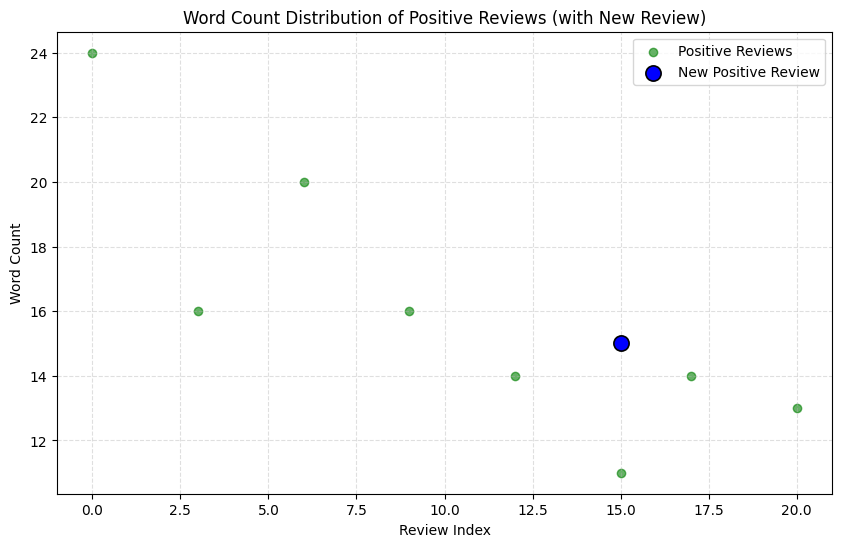

New positive review plotted successfully near existing positive cluster.


In [13]:
import matplotlib.pyplot as plt
import numpy as np
import string

try:
    # New positive review
    new_review = "This product is absolutely amazing, the quality exceeded my expectations and I highly recommend it!"
    cleaned_new_review = new_review.lower().translate(str.maketrans('', '', string.punctuation))
    new_word_count = len(cleaned_new_review.split())

    # Get only positive reviews
    positive_reviews = df[df["Sentiment"] == "positive"]["word_count"]

    # Choose a position near existing positive reviews
    random_index = np.random.choice(positive_reviews.index)

    # Plot positive reviews
    plt.figure(figsize=(10,6))
    plt.scatter(
        positive_reviews.index,
        positive_reviews,
        color='green',
        alpha=0.6,
        label='Positive Reviews'
    )

    # Plot the new positive review point near the cluster
    plt.scatter(
        random_index,
        new_word_count,
        color='blue',
        s=120,
        edgecolors='black',
        linewidths=1.2,
        label='New Positive Review',
        zorder=5
    )

    # Chart details
    plt.title("Word Count Distribution of Positive Reviews (with New Review)")
    plt.xlabel("Review Index")
    plt.ylabel("Word Count")
    plt.legend()
    plt.grid(alpha=0.4, linestyle='--')
    plt.show()

    print("New positive review plotted successfully near existing positive cluster.")

except Exception as e:
    print("Error while plotting new positive review:", e)
